In [43]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Descriptors, rdFreeSASA
from rdkit.Chem import AllChem
plt.rcParams['font.size'] = 15


def compute_molecular_properties(smiles):
    """Compute HBD surface area, polar positive surface area, and formal charge for a molecule."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None, None  # Return None for invalid molecules

    HBD_surface_area = sum(rdMolDescriptors._CalcTPSAContribs(mol)[i] for i, atom in enumerate(mol.GetAtoms()) 
                           if atom.GetTotalNumHs() > 0 and atom.GetAtomicNum() in [7, 8, 9])  # N, O, F
    tpsa_contributions = rdMolDescriptors._CalcTPSAContribs(mol)
    polar_positive_surface_area = sum(
        tpsa_contributions[i] for i, atom in enumerate(mol.GetAtoms())
        if atom.GetAtomicNum() in {7, 8, 9} or  # N or O
           (atom.GetAtomicNum() == 1 and atom.GetNeighbors()[0].GetAtomicNum() in {7, 8, 9})  # H attached to N/O/F
    )
    # Compute Polar Positive Surface Area (approximate as TPSA of positively charged atoms)
    # Compute Formal Charge (sum of atomic charges)
    formal_charge = sum(atom.GetFormalCharge() for atom in mol.GetAtoms())
    return HBD_surface_area, polar_positive_surface_area,formal_charge


def load_data(csv_file):
    df = pd.read_csv(csv_file)
    df = df.dropna(subset=['canonical_smiles'])
    return df

# Convert SMILES to RDKit Mol objects
def smiles_to_mol(smiles):
    return Chem.MolFromSmiles(smiles) if smiles else None

def plot_eNTRy_violins(df):
    """Plot vertical violin plots of mtb_old_resid_std for each dataset, based on rule compliance."""
    
    # Filter molecules that satisfy eNTRy and/or Lipinski's Rule of Five
    filtered_df = df[(df['eNTRy'] == True)]

    plt.figure(figsize=(8, 6))
    
    custom_order = ['1200', '380', '40']
    custom_palette = {'1200': 'blue', '380': 'orange', '40': 'red'}
    # Create violin plot
    ax = sns.violinplot(x="dataset", y="mtb_old_resid_std", data=filtered_df, 
                         order=custom_order, inner="quart", palette=custom_palette, alpha=0.5)
    # Add text labels above each violin
    for i, dataset in enumerate(custom_order):
        count = len(filtered_df[filtered_df['dataset'] == int(dataset)])
        #count = count[0] if len(count) > 0 else 0  # Extract count safely
        
        ax.text(i, 2.70, str(count), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.plot(range(-1,4), [0 for i in range(-1,4)], linestyle = '--', color = 'black')
    # Customize plot
    plt.ylim(-4, 4)
    plt.xlim(-0.5, 2.5)
    plt.xlabel("Dataset")
    plt.ylabel("Standardized Mtb Residual")
    plt.title("Mtb Standardized Residuals for mols that satisfy eNTRy Rules")
    plt.savefig('./Figure_S6A.svg')
    # Show the plot
    plt.show()

def plot_Hergenrother_violins(df):
    """Plot vertical violin plots of mtb_old_resid_std for each dataset, based on rule compliance."""
    
    # Filter molecules that satisfy eNTRy and/or Lipinski's Rule of Five
    filtered_df = df[(df['Hergenrother'] == True)]
    plt.figure(figsize=(8, 6))
    
    custom_order = ['1200', '380', '40']
    custom_palette = {'1200': 'blue', '380': 'orange', '40': 'red'}
    # Create violin plot
    ax = sns.violinplot(x="dataset", y="mtb_old_resid_std", data=filtered_df, 
                         order=custom_order, inner="quart", palette=custom_palette, alpha=0.5)

    # Add text labels above each violin
    for i, dataset in enumerate(custom_order):
        count = len(filtered_df[filtered_df['dataset'] == int(dataset)])
        ax.text(i, 2.70, str(count), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
    plt.plot(range(-1,4), [0 for i in range(-1,4)], linestyle = '--', color = 'black')
    # Customize plot
    plt.ylim(-4, 4)
    plt.xlim(-0.5, 2.5)
    plt.xlabel("Dataset")
    plt.ylabel("Standardized Mtb Residual")
    plt.title("Mtb Standardized Residuals for mols that satisfy Hergenrother's Rules")
    plt.savefig('./Figure_S6B.svg')
    # Show the plot
    plt.show()

In [44]:
csv_file = "./processed_data/combined_dataset_with_props.csv"  # Replace with your file path
df = load_data(csv_file)
df['mol'] = df['canonical_smiles'].apply(smiles_to_mol)
df = df.dropna(subset=['mol'])


In [45]:
#Calculate Hergenrother Properties
df[['HBD_surface_area', 'polar_positive_surface_area', 'formal_charge']] = df['canonical_smiles'].apply(
    lambda smi: pd.Series(compute_molecular_properties(smi))
)

df['Hergenrother'] = (df['HBD_surface_area'] >= 23) & ((df['polar_positive_surface_area'] >= 80) | (df['formal_charge'] >= 0.98))

In [46]:
print(df.dtypes)

logReact                       float64
mtb                            float64
msm                            float64
has_ring                          bool
mtb_old_resid                  float64
                                ...   
abs_charge                       int64
mol                             object
HBD_surface_area               float64
polar_positive_surface_area    float64
Hergenrother                      bool
Length: 98, dtype: object


/var/folders/75/78whjlj96h959zd7cp3d_f9m0000gn/T/ipykernel_73386/3945487676.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="dataset", y="mtb_old_resid_std", data=filtered_df,


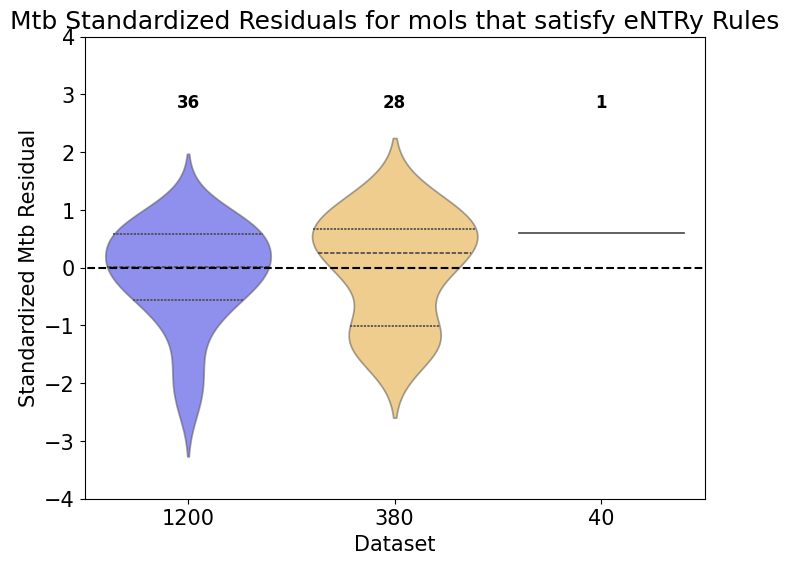

In [47]:
plot_eNTRy_violins(df)

/var/folders/75/78whjlj96h959zd7cp3d_f9m0000gn/T/ipykernel_73386/3945487676.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="dataset", y="mtb_old_resid_std", data=filtered_df,


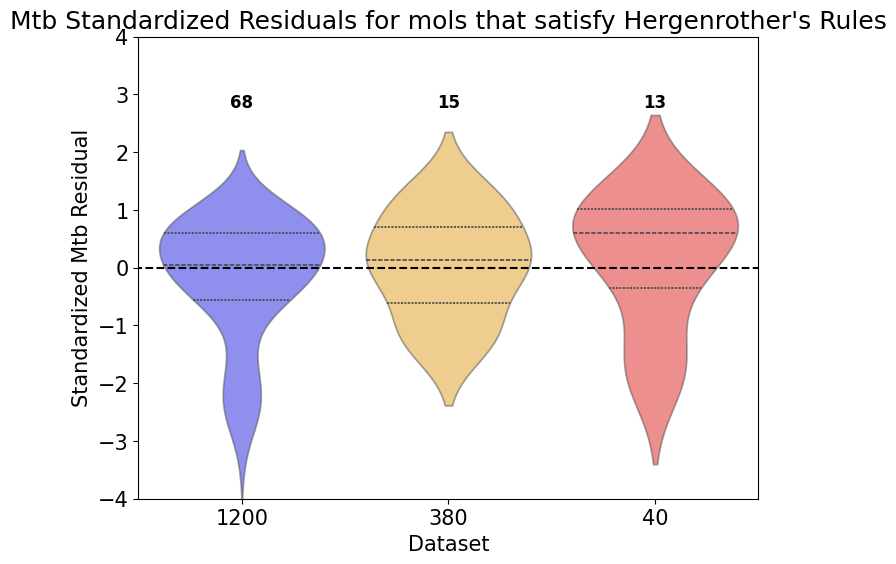

In [48]:
plot_Hergenrother_violins(df)

In [49]:
#Save Permeability 